# Filters, Contrast, Transformation and Morphology
>  You will learn to detect object shapes using edge detection filters, improve medical images with contrast enhancement and even enlarge pictures to five times its original size! You will also apply morphology to make thresholding more accurate when segmenting images and go to the next level of processing images with Python.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Image Processing in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

## Jump into filtering

### Edge detection

<div class=""><p>In this exercise, you'll detect edges in an image by applying the Sobel filter.
</p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/e40f9d1aec6b6394f636d3e96e5bc46a123f2545/soaps.jpg" width="30%" alt="Soap pills of heart and rectangle shapes in blue background">
</center>
<center>Image preloaded as <code>soaps_image</code>.</center><p></p>
<p>The<code>show_image()</code> function has been already loaded for you.</p>
<p>Let's see if it spots all the figures in the image.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/soaps_image.jpg
soaps_image = plt.imread('soaps_image.jpg')

Instructions
<ul>
<li>Import the <code>color</code> module so you can convert the image to grayscale.</li>
<li>Import the <code>sobel()</code> function from <code>filters</code> module.</li>
<li>Make <code>soaps_image</code> grayscale using the appropriate method from the <code>color</code> module.</li>
<li>Apply the sobel edge detection filter on the obtained grayscale image <code>soaps_image_gray</code>.</li>
</ul>

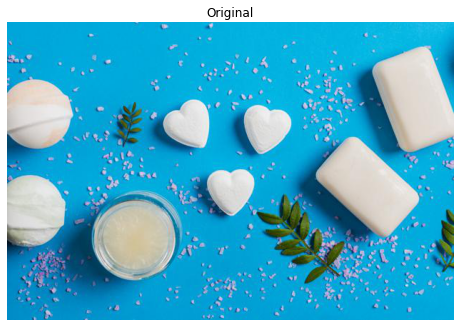

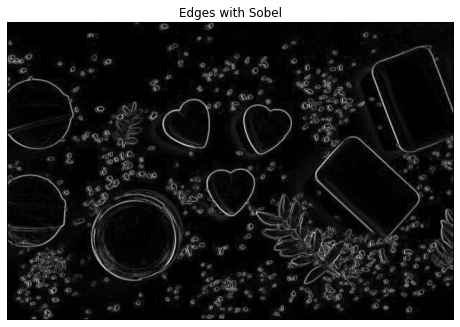

In [ ]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

**You succesfully detected the edges in the image. As you can see, the edges of all the figures in the scene are highlighted.**

### Blurring to reduce noise

<div class=""><p>In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.</p>
<p></p><center>
  <img src="https://assets.datacamp.com/production/repositories/4470/datasets/0782692803666712f80e62b7ca83e803861b6ed6/toa-sharp-def-3.jpg" alt="Building in Lodon" width="20%">
</center>
<center>
    Image loaded as <code>building_image</code>.
</center><p></p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/building_image.jpg
building_image = plt.imread('building_image.jpg')

Instructions
<ul>
<li>Import the Gaussian filter. </li>
<li>Apply the filter to the <code>building_image</code>, set the multichannel parameter to the correct value.</li>
<li>Show the original <code>building_image</code> and resulting <code>gaussian_image</code>.</li>
</ul>

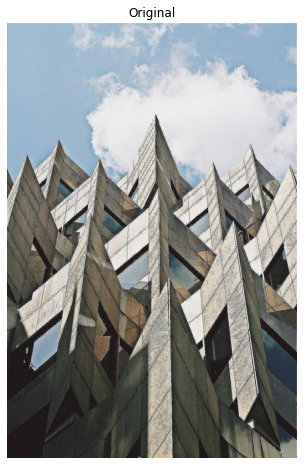

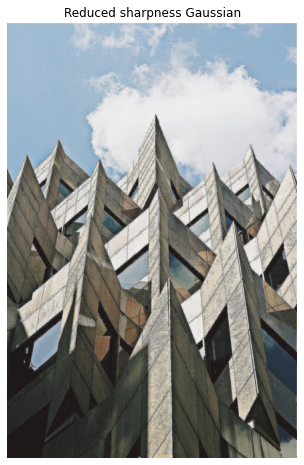

In [ ]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

**You have removed the excessive sharpness in the image.**

### Contrast enhancement

### What's the contrast of this image?

<div class=""><p><img src="https://assets.datacamp.com/production/repositories/4470/datasets/84ceaf200a4d3e30b738ae4770ef1a98f7980db9/clock_image.png" width="45%" alt="Black and white clock hanging and moving">
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/8cebe2e3f43ee61bd7f39825cb285c58c0302523/contrast_histogram_1.png" width="50%" alt="Histogram of the clock's image"></p>
<p>The histogram tell us.</p>
<p>Just as we saw previously, you can calculate the contrast by calculating the <strong>range</strong> of the pixel intensities i.e. by subtracting the minimum pixel intensity value from the <strong>histogram</strong> to the maximum one.</p>
<p>You can obtain the maximum pixel intensity of the image by using the <code>np.max()</code> method from NumPy and the minimum with <code>np.min()</code> <strong>in the console</strong>.</p>
<p>The image has already been loaded as <code>clock_image</code>, NumPy as <code>np</code> and the <code>show_image()</code> function.</p></div>

<pre>
Possible Answers
The contrast is 255 (high contrast).
<b>The contrast is 148.</b>
The contrast is 189.
The contrast is 49 (low contrast).
</pre>

In [ ]:
np.max(clock_image) - np.min(clock_image)

**You calculated the range of the pixels intensities in the histogram, and so, the contrast of the image!**

### Medical images

<div class=""><p>You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the <a href="https://www.kaggle.com/nih-chest-xrays" target="_blank" rel="noopener noreferrer">National Institutes of Health Chest X-Ray Dataset</a>
<br>
</p><center><img src="https://assets.datacamp.com/production/repositories/4470/datasets/a0abe7fb876883411f306561c000e6cdecfe4e91/contrast_00000109_005.png" alt="X-ray chest image" width="25%/"></center>
<br>
<center><em>Image loaded as <code>chest_xray_image</code>.</em></center><p></p>
<p>First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast. Remember we obtain the histogram by using the <code>hist()</code> function from Matplotlib, which has been already imported as <code>plt</code>.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/chest_xray_image.jpg
chest_xray_image = plt.imread('chest_xray_image.jpg')

Instructions 1/4
<li>Import the required Scikit-image module for contrast.</li>

In [ ]:
# Import the required module
from skimage import exposure

Instructions 2/4
<li>Show the histogram from the original x-ray image <code>chest_xray_image</code>, using  the <code>hist()</code> function.</li>

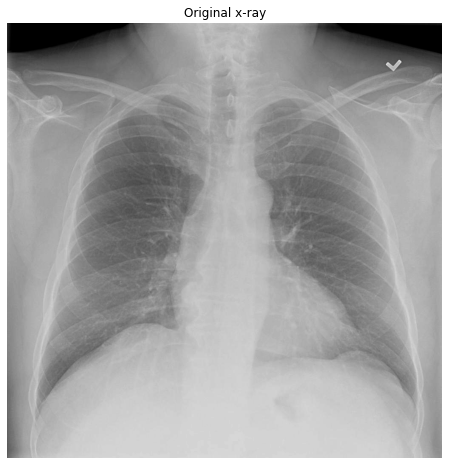

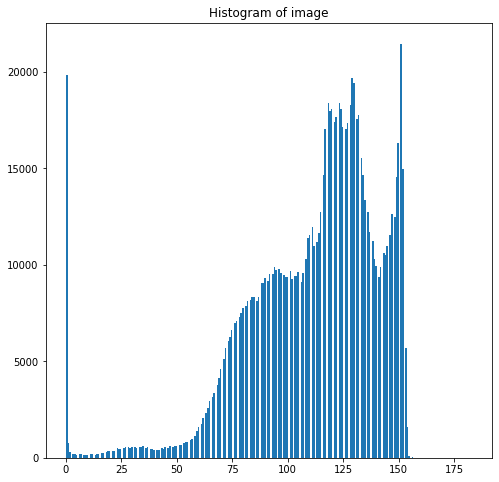

In [ ]:
# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

Instructions 3/4
<li>Use histogram equalization on <code>chest_xray_image</code> to obtain the improved image and load it as <code>xray_image_eq</code>.</li>

In [ ]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

Instructions 4/4
<li>Show the resulting improved image <code>xray_image_eq</code>.</li>

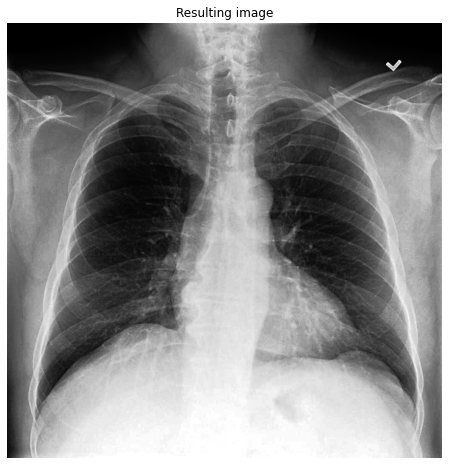

In [ ]:
# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

**Now you can apply this code and knowledge to other similar images.**

### Aerial image

<div class=""><p>In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.
</p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/bcdab87fe0975f4451869ead252972396da2d83b/5.2.09.png" alt="Aerial image, airport taken from the air" width="30%">
  <br>
<em>Image loaded as <code>image_aerial</code>.</em>
</center><p></p>
<p>For this we will use the normal or standard technique of Histogram Equalization.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/image_aerial.jpg
image_aerial = plt.imread('image_aerial.jpg')

Instructions
<ul>
<li>Import the required module from scikit-image.</li>
<li>Use the histogram equalization function from the module previously imported.</li>
<li>Show the resulting image.</li>
</ul>

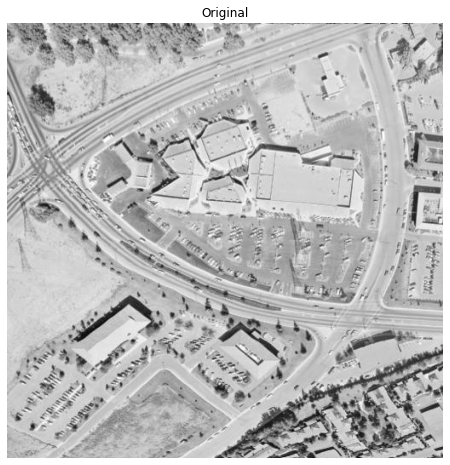

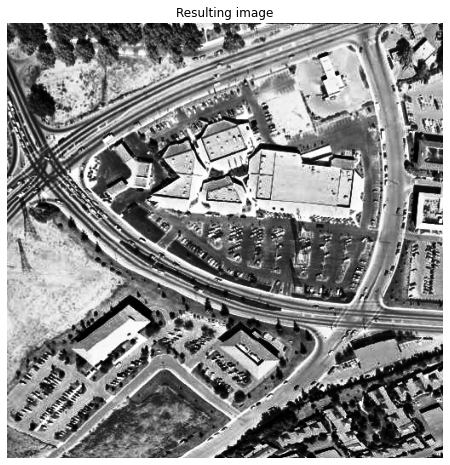

In [ ]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

**Now we can see more details of the objects in the image.**

### Let's add some impact and contrast

<div class=""><p>Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?</p>
<p>In this exercise, you'll increase the contrast of a cup of coffee.
Something you could share with your friends on social media. Don't forget to use <strong>#ImageProcessingDatacamp</strong> as hashtag!</p>
<p>Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/e9e004e21c5b5c3b6e4ff06fa4cc576f0106ca11/coffee_original.png" alt="Cup of coffee">
</center><p></p>
<p>A function called <code>show_image()</code>, that displays an image using Matplotlib, has already been defined. It has the arguments <code>image</code> and <code>title</code>, with <code>title</code> being <code>'Original'</code> by default.</p></div>

Instructions
<ul>
<li>Import the module that includes the Contrast Limited Adaptive Histogram Equalization (CLAHE) function.</li>
<li>Obtain the image you'll work on, with a cup of coffee in it, from the module that holds all the images for testing purposes.</li>
<li>From the previously imported module, call the function to apply the adaptive equalization method on the original image and set the clip limit to 0.03.</li>
</ul>

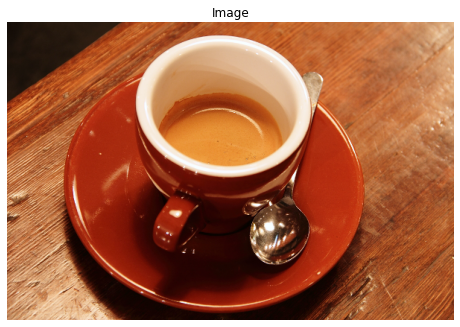

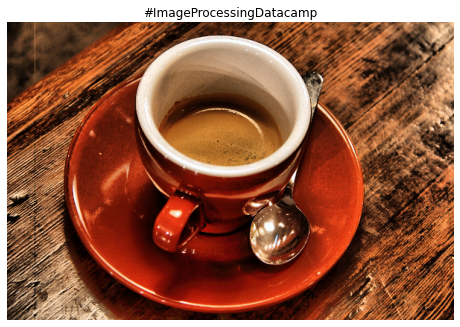

In [ ]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

**You have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.**

## Transformations

### Aliasing, rotating and rescaling

<div class=""><p>Let's look at the impact of aliasing on images. </p>
<p>Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.</p>
<p>You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/98ae7ee183329b00b10f2e0bcc4e25943e03aebd/kitty2.jpg" width="25%" alt="Little cute cat">
  <br>
<em>Image preloaded as <code>image_cat</code>.</em>
</center><p></p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/image_cat.jpg
image_cat = plt.imread('image_cat.jpg')

Instructions 1/4
<li>Import the module and the rotating and rescaling functions.</li>

In [ ]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

Instructions 2/4

In [ ]:
# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

Instructions 3/4
<li>Rescale the <code>cat_image</code> to be 4 times smaller and apply the anti aliasing filter. Set whether or not the image should be treated as multichannel (colored).</li>

In [ ]:
# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

Instructions 4/4
<li>Rescale the <code>rotated_cat_image</code> to be 4 times smaller without applying an anti aliasing filter.</li>

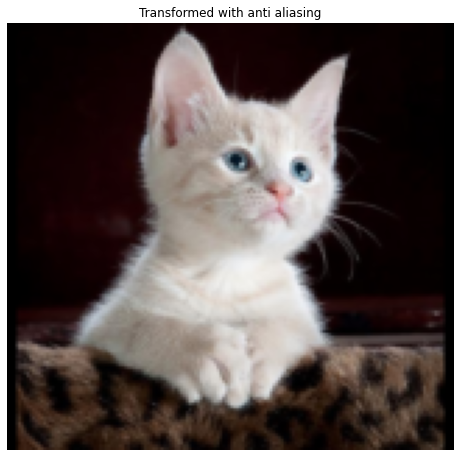

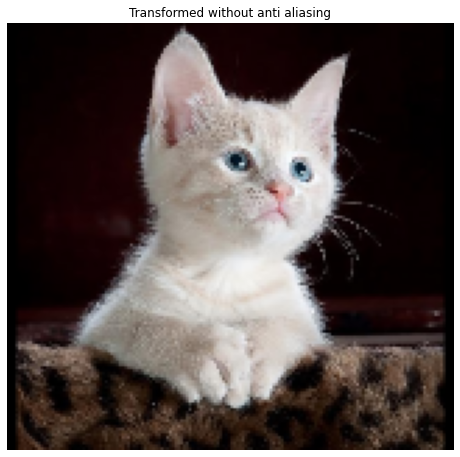

In [ ]:
# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

**Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.**

### Enlarging images

<div class=""><p>Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry. </p>
<p>The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point. </p>
<p>In this exercise you'll enlarge an image <strong>three times</strong>!! </p>
<p>You'll do this by rescaling the image of a rocket, that will be loaded from the <code>data</code> module.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/2363d344b1d6dc36812842144efa657358175e7f/rocket.png" alt="Rocket">
</center><p></p></div>

In [ ]:
def show_image2(image, title='Original'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

Instructions
<ul>
<li>Import the module and function needed to enlarge images, you'll do this by rescaling.</li>
<li>Import the <code>data</code> module.</li>
<li>Load the <code>rocket()</code> image from <code>data</code>.</li>
<li>Enlarge the <code>rocket_image</code> so it is 3 times bigger, with the anti aliasing filter applied. <em>Make sure to set <code>multichannel</code> to <code>True</code> or you risk your session timing out!</em></li>
</ul>

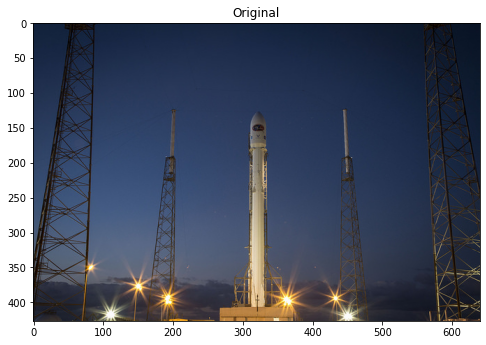

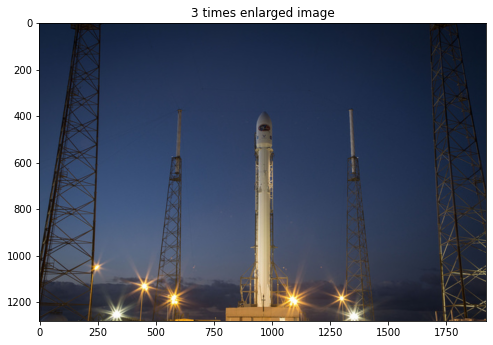

In [ ]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image2(rocket_image)
show_image2(enlarged_rocket_image, "3 times enlarged image")

**The image went from being 600 pixels wide to over 2500 and it still does not look poorly pixelated.**

### Proportionally resizing

<div class=""><p>We want to downscale the images of a veterinary blog website so all of them have the same compressed size.</p>
<p>It's important that you do this proportionally, meaning that these are not distorted.</p>
<p>First, you'll try it out for one image so you know what code to test later in the rest of the pictures.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/736b12a3d210b0ac3f6bca28174cfd6522a0ad06/dogs4.jpg" width="50%">
  <br>
<em>The image preloaded as <code>dogs_banner</code>.</em>
</center><p></p>
<p>Remember that by looking at the shape of the image, you can know its width and height.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/dogs_banner.jpg
dogs_banner = plt.imread('dogs_banner.jpg')

Instructions
<ul>
<li>Import the module and function to resize.</li>
<li>Set the proportional height and width so it is half the image's height size.</li>
<li>Resize using the calculated proportional height and width.</li>
</ul>

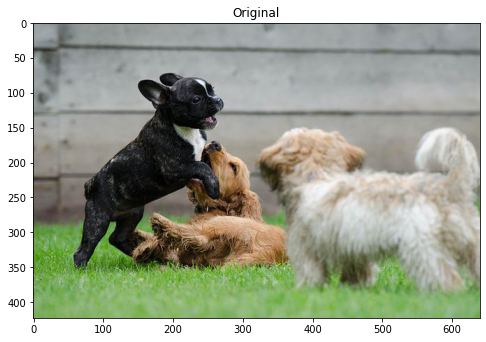

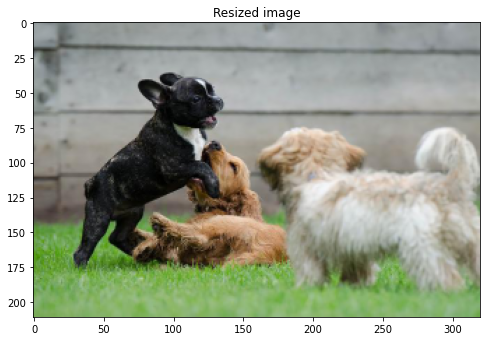

In [ ]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1]  / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and rotated image
show_image2(dogs_banner, 'Original')
show_image2(image_resized, 'Resized image')

**The image is now compressed and ready. We can use this code for future images that are uploaded to the website.**

### Handwritten letters

<div class=""><p>A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (<strong>OCR</strong>) to distinguish printed or handwritten text characters inside digital images of physical documents.</p>
<p>Let's try to improve the definition of this handwritten letter so that it's easier to classify.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/2c10093e2b260a87d83dc48a724b68dc9bb8e092/r5.png" width="40%/">
</center><p></p>
<p>As we can see it's the letter <em>R</em>, already binary, with some noise in it. It's already loaded as <code>upper_r_image</code>.</p>
<p>Apply the morphological operation that will discard the pixels near the letter boundaries.</p></div>

In [ ]:
from skimage import color

In [ ]:
upper_r_image = plt.imread('r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

Instructions
<ul>
<li>Import the module from scikit-image.</li>
<li>Apply the morphological operation for eroding away the boundaries of regions of foreground pixels.</li>
</ul>

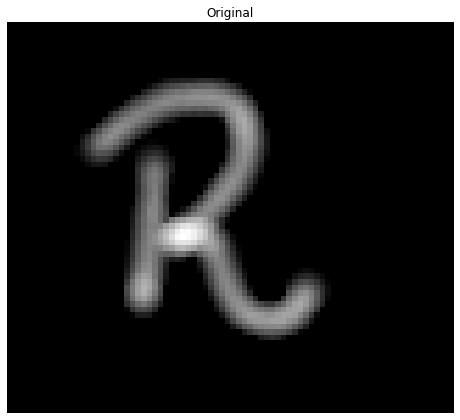

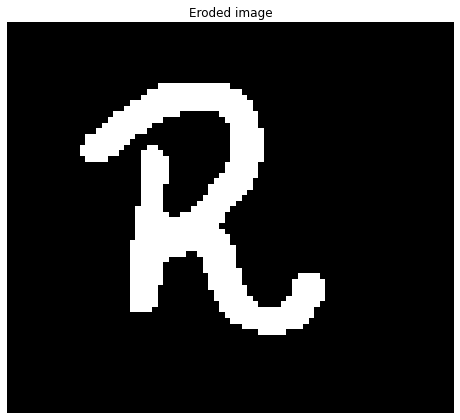

In [ ]:
# Import the morphology module
from skimage import morphology


# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')

**As you can see, erosion is useful for removing minor white noise.**

### Improving thresholded image

<div class=""><p>In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.</p>
<p></p><center>
  <img src="https://assets.datacamp.com/production/repositories/4470/datasets/4cb480ae93ab7dd7b8b17e4b88e8acb20a0d7d6a/world_image_binary.jpg" width="80%" alt="World map">
  <br>
<em>Image already loaded as <code>world_image</code>.</em>
</center><p></p>
<p>This operation, in a way, <em>expands</em> the objects in the image.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/world_image.jpg
world_image = plt.imread('world_image.jpg')

Instructions
<ul>
<li>Import the module.</li>
<li>Obtain the binarized and dilated image, from the original image <code>world_image</code>.</li>
</ul>

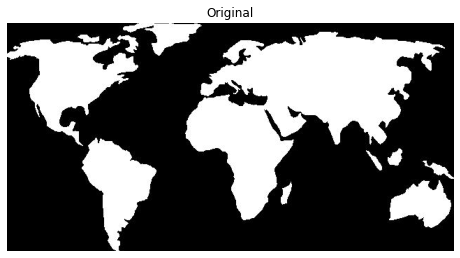

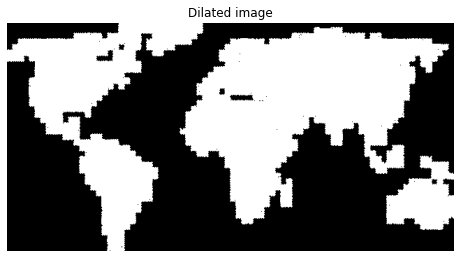

In [ ]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')

**You removed the noise of the segmented image and now it's more uniform.**